# Unidad 3 - Casos Práticos

En esta unidad, llevaremos a cabo varios ejercicios en las que aplicaremos integralmente los conocimientos adquiridos recientemente, así como los aprendidos en unidades previas. Al concluir estas prácticas, se espera que el estudiante consolide su entendimiento sobre **funciones**, **clases y métodos** y **tratamiento de fechas**.

Se aconseja encarecidamente que el estudiante intente resolver los ejercicios de manera independiente antes de consultar las soluciones que se ofrecen. Es importante recordar que un mismo problema puede tener múltiples respuestas correctas, todas válidas, aunque siempre debemos esforzarnos por adherirnos al Zen de Python.


## Ejercicio 1: Flota de Camiones

Tenemos una empresa que gestiona una flota de camiones. Almacenamos la siguiente información de nuestros vehículos en formato diccionario, donde la clave es el identificador del vehiculo y el valor una lista que contiene la información del modelo, el año y la matrícula. Los tipos de datos serán los siguientes:

* id-->numerico
* Modelo del vehículo--> cadena
* Año de compra -->numérico (int)
* Matrícula-->cadena

Trabajaremos con el siguiente diccionario como punto de partida:

```python	
camiones = {
    201: ["Renault",2020,"3541BW4"],
    202: ["Mercedes",2018, "9834HJ1"],
    203: ["Volvo", 2005, "6712CK9"],
    204: ["BMW",2023, "1289LM2"]
}
```

Las mátriculas siempre acaban en una letra pero ha habido un problema en el almacenamiento de los datos y la matrícula se ha quedado corrupta, la última letra de la misma se ha cambiado por un número. Nos piden que solventemos este error. 

Para ello vamos a calcular nosotros la última letra de cada matrícula de la siguiente manera: tomamos el número completo de hasta 4 cifras de nuestra matrícula, lo dividimos entre
20 y nos quedamos con el resto de dicha división, o dicho de otro modo, calculamos el módulo 20 de la matrícula.

A cada uno de estos posibles restos le corresponde una letra, según la siguiente tabla:

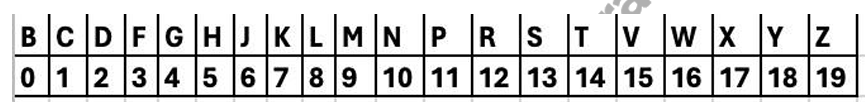

Debemos estos pasos para llevar a cabo la tarea:

1. Definiremos una función main() que es la que ejecutará todo el programa. Dentro de la misma generaremos un bucle que vaya recorriendo uno a uno los elementos del diccionario.
2. Dentro de ese bucle, llamaremos a dos funciones con los argumentos adecuados: GetNumber(string), y GerLetter(int)
3. La función GetNumber(), recibirá como argumento la matrícula completa con la letra errónea (en formato string ya que está en una sola variable), y nos devolverá el número separado de la letra errónea de la misma.Sólo nos devolverá el número.
4. La función GerLetter(), recibirá como argumento el número de la matrícula, y calculará la letra correcta, agregándola al número y devolviendo una cadena con la matrícula correcta.
5. Modificaremos la matrícula en el diccionario por la correcta

In [35]:
# Introduce aqui tus definiciones de funciones
import re

def GetNumber(matricula: str) -> (int, str):
    """Extrae el número de la matrícula y las letras excepto la última."""
    match = re.match(r'(\d+)([A-Z]*)', matricula)  # Separa números y letras
    if match:
        numero = int(match.group(1))  
        letras = match.group(2) 
        return numero, letras
    return 0, ""


def GetLetter(numero: int) -> str:
    """Calcula la letra correcta basada en el módulo 20 del número de matrícula."""
    letras = "BCDFGHJKLMNPRSTVWXYZ" 
    return letras[numero % 20]

In [42]:
def main():
    camiones = {
        201: ["Renault", 2020, "3541BW4"],
        202: ["Mercedes", 2018, "9834HJ1"],
        203: ["Volvo", 2005, "6712CK9"],
        204: ["BMW", 2023, "1289LM2"]
    }
    
    for idCamion, datos in camiones.items():
        numero, letras = GetNumber(datos[2])  
        letraOk = GetLetter(numero)  
        matriculaOk = str(numero) + letras + letraOk  
        camiones[idCamion][2] = matriculaOk
    
    print("Matrículas:")
    for idCamion, datos in camiones.items():
        print(f"ID Camión {idCamion}: {datos}")

In [43]:
# Ejecuta la función main para probar tu código
main()

Matrículas:
ID Camión 201: ['Renault', 2020, '3541BWC']
ID Camión 202: ['Mercedes', 2018, '9834HJT']
ID Camión 203: ['Volvo', 2005, '6712CKR']
ID Camión 204: ['BMW', 2023, '1289LMM']


## Ejercicio 2: Lambda Functions

Este ejercicio es más cortito, vamos a hacer un repaso de las funciones lambda.

### 2.1. Valores cuadrados 

Escribe un programa que cree una lista (usando lambda) cuyos elementos son el cuadrado de los elementos de la lista [1,2,3,4,5,6,7,8,9,10].

In [44]:
# Introduce aqui tu código
numeros = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cuadrados = list(map(lambda x: x**2, numeros))
print(cuadrados)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


### 2.2. Cuadrados de los números pares 

Ahora escribe un programa que haga una lista (usando lambda) cuyos elementos sean el cuadrado de los números pares de la lista [1,2,3,4,5,6,7,8,9,10]

In [46]:
# Introduce aqui tu código
numeros = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
pares_cuadrados = list(map(lambda x: x**2, filter(lambda x: x % 2 == 0, numeros)))
print(pares_cuadrados)

[4, 16, 36, 64, 100]


### 2.3 Conteo de letras

Por último, escribe un programa que dada una lista palabras devuelva una lista con el numero de letras de cada palabra. Usa lambda.

In [49]:
# Introduce aqui tu código
texto = input("Dime una frase para contar las letras que la componen: ")
palabras = texto.split()
conteo_letras = list(map(lambda palabra: len(palabra), palabras))
print(conteo_letras)


Dime una frase para contar las letras que la componen:  cuenta esta frase


[6, 4, 5]


## Ejercicio 3: Sistema Bancario

En este ejercicio se plantea modelizar, mediante la Programación Orientada a Objetos, a los clientes de un banco. La información y los comportamientos que se quieren modelizar son los siguientes: 
   * Cuando un cliente nuevo se registra en la entidad se le solicita nombre, apellidos y su fecha de nacimiento, los clientes tienen que ser mayores de 18 años y el formato de entrada de la fecha de nacimiento es una cadena YYYY/MM/DD (AÑO/MES/DIA)
   * El sistema automáticamente asignará al cliente un identificador de 6 dígitos que es el identificador único del cliente en el banco.  
   * Al darse de alta los clientes comienzan con un saldo en cuenta de 0€ 
   * Los clientes pueden aumentar (o disminuir) este saldo mediante retiradas y depósitos, no se podrá hacer una retirada si el cliente no tiene saldo disponible.
   * Al cliente se le muestra un mensaje de bienvenida al banco 
   * Los clientes pueden realizar transferencias entre ellos, esto implica aumentar el saldo en cuenta de uno y disminutir el saldo en cuenta del de otro.

### 3.1. Método Constructor: definición de atributos

Define una clase llamada `Cliente` junto con su método constructor. Te en cuenta lo siguiente:
   * Es necesario transformar la fecha de entrada a tipo datetime y comprobar que el cliente tiene 18 años, lanzar una excepción ´ValueError´ en caso contrario. Para el calculo de la edad se puede hacer una diferencia entre fechas y asumir que todos los años tienen 365 días.    
   * Hay que llevar un conteo del número de clientes en el banco para asignar el ID del cliente dentro del método constructor. El primer cliente es el '000001', el segundo '0000002'... el método `zfill` de los str puede ser útil para rellenar con ceros.

In [35]:
from datetime import datetime

class Cliente:
    contador_clientes = 0

    def __init__(self, nombre, apellidos, fecha_nacimiento_str):
        self.nombre = nombre
        self.apellidos = apellidos

        try:
            fecha_nacimiento = datetime.strptime(fecha_nacimiento_str, "%Y/%m/%d")
        except ValueError:
            raise ValueError("La fecha de nacimiento debe tener el formato YYYY/MM/DD")

        hoy = datetime.now()
        edad_dias = (hoy - fecha_nacimiento).days
        edad = edad_dias // 365

        if edad < 18:
            raise ValueError("El cliente debe ser mayor de 18 años")

        self.fecha_nacimiento = fecha_nacimiento
        Cliente.contador_clientes += 1
        self.id_cliente = str(Cliente.contador_clientes).zfill(6)
        self.saldo = 0.0
        
        print(f"Bienvenido al banco, {self.nombre} {self.apellidos}. Tu ID es {self.id_cliente}")

# Nota: para poder ejecutar las funciones como parte de la clases clientes deben estar en la misma 
# clase para que el porgrama los encuentre, pero los dejaremos indicados y separados en las sigientes celdas para que sean vistos de manera sencilla
    # Métodos de instancia: saludo, depositos y retiradas   
    def saludo(self):
        print(f"Hola {self.nombre}, tu saldo actual es de {self.saldo:.2f}€.")
    
    def deposito(self, cantidad):
        self.saldo += cantidad
        print(f"Se han ingresado {cantidad:.2f}€. Nuevo saldo: {self.saldo:.2f}€.")
    
    def retirada(self, cantidad):
        if cantidad > self.saldo:
            print("Operación no permitida: saldo insuficiente.")
        else:
            self.saldo -= cantidad
            print(f"Se han retirado {cantidad:.2f}€. Nuevo saldo: {self.saldo:.2f}€.")
            
    # Realizar transferencias
    @staticmethod
    def transferencia(emisor, receptor, cantidad):
        if cantidad > emisor.saldo:
            print(f"Operación no permitida: {emisor.nombre} no tiene saldo suficiente para transferir {cantidad:.2f}€.")
        else:
            emisor.saldo -= cantidad
            receptor.saldo += cantidad
            print(f"Se han transferido {cantidad:.2f}€ de {emisor.nombre} a {receptor.nombre}.")
            print(f"Nuevo saldo de {emisor.nombre}: {emisor.saldo:.2f}€.")
            print(f"Nuevo saldo de {receptor.nombre}: {receptor.saldo:.2f}€.")


### 3.2 Métodos de instancia: saludo, depositos y retiradas

Añade ahora tres métodos de instancia a esta clase cliente:
 * saludo: mediante funciones print da la bienvenida al cliente mostrando su nombre y su saldo en cuenta.
 * depósito: realiza un ingreso de dinero en la cuenta, recibe como parámetro la cantidad a ingresar y la suma al saldo de la cuenta.
 * retirada: realiza una retirada, recibe como parámtro la canidad a ingresar y la resta del saldo en cuenta. Debe comprobar primero que el saldo es superior a la cantidad, en caso contrario muestra por pantalla que la operación no se puede realizar.


In [36]:
# Introduce aqui tu código
def saludo(self):
    print(f"Hola {self.nombre}, tu saldo actual es de {self.saldo:.2f}€.")

def deposito(self, cantidad):
    self.saldo += cantidad
    print(f"Se han ingresado {cantidad:.2f}€. Nuevo saldo: {self.saldo:.2f}€.")

def retirada(self, cantidad):
    if cantidad > self.saldo:
        print("Operación no permitida: saldo insuficiente.")
    else:
        self.saldo -= cantidad
        print(f"Se han retirado {cantidad:.2f}€. Nuevo saldo: {self.saldo:.2f}€.")

### 3.3 Realizar transferencias

Para acabar con la implementación hay que definir la posibilidad de hacer transferencias, esto puede ser definido como una función ajena a la clase Cliente o como un método estático de esta. En cualquier caso sería una función de tres parámetros:
 * emisor: instancia del cliente emisor de transferencia
 * receptor: instancia del cliente receptor de transferencia
 * cantidad: cantidad a transferir.
 
Internamente esta función comprobará que el cliente emisor puede hacer la transferencia y decudirá esa cantidad de su saldo para ingresárselo al otro.

In [37]:
# Introduce aqui tu código
@staticmethod
def transferencia(emisor, receptor, cantidad):
    if cantidad > emisor.saldo:
        print(f"Operación no permitida: {emisor.nombre} no tiene saldo suficiente para transferir {cantidad:.2f}€.")
    else:
        emisor.saldo -= cantidad
        receptor.saldo += cantidad
        print(f"Se han transferido {cantidad:.2f}€ de {emisor.nombre} a {receptor.nombre}.")
        print(f"Nuevo saldo de {emisor.nombre}: {emisor.saldo:.2f}€.")
        print(f"Nuevo saldo de {receptor.nombre}: {receptor.saldo:.2f}€.")

### 3.4 Crear clientes y probar el sistema

Es hora de poner a funcionar nuestro banco! Para comprobar el correcto funcionamiento del sistema realiza los siguientes pasos:
 * Crea tres clientes nuevos, dos de ellos con más de 18 años y uno con menos, para comprobar el chequeo de la edad.
 * Realiza un depósito y una retirada en una de las cuentas.
 * Intenta realizar una retirada en una cuenta sin saldo.
 * Realiza una transferencia entre dos de los clientes.
 * Muestra el saldo de las cuentas de los clientes.

*Creación de los clientes*

In [38]:
# Crea cliente 1
cliente1 = Cliente("Maria", "Nogal ayuso", "2005/01/12")

Bienvenido al banco, Maria Nogal ayuso. Tu ID es 000001


In [39]:
# Crea cliente 2
cliente2 = Cliente("Víctor", "Guerra Rubio", "2000/11/09")


Bienvenido al banco, Víctor Guerra Rubio. Tu ID es 000002


In [40]:
# Crea cliente menor de edad
cliente3 = Cliente("Marco", "Martin Blanco", "2010/01/12")

ValueError: El cliente debe ser mayor de 18 años

*Depósitos y retiradas*

In [41]:
# realiza deposito
cliente1.saludo()
cliente1.deposito(200)
cliente1.saludo()
print("---------")
cliente2.saludo()
cliente2.deposito(200)
cliente2.saludo()


Hola Maria, tu saldo actual es de 0.00€.
Se han ingresado 200.00€. Nuevo saldo: 200.00€.
Hola Maria, tu saldo actual es de 200.00€.
---------
Hola Víctor, tu saldo actual es de 0.00€.
Se han ingresado 200.00€. Nuevo saldo: 200.00€.
Hola Víctor, tu saldo actual es de 200.00€.


In [42]:
# realiza retirada
cliente1.saludo()
cliente1.retirada(50)
cliente1.saludo()
cliente1.retirada(100)

Hola Maria, tu saldo actual es de 200.00€.
Se han retirado 50.00€. Nuevo saldo: 150.00€.
Hola Maria, tu saldo actual es de 150.00€.
Se han retirado 100.00€. Nuevo saldo: 50.00€.


In [43]:
# realiza retiro mayor al saldo
print("---------")
cliente2.retirada(50)
cliente2.saludo()
cliente2.retirada(1000)

---------
Se han retirado 50.00€. Nuevo saldo: 150.00€.
Hola Víctor, tu saldo actual es de 150.00€.
Operación no permitida: saldo insuficiente.


*Transferencias*

In [44]:
Cliente.transferencia(cliente1, cliente2, 10)
cliente1.saludo()
cliente2.saludo()

Se han transferido 10.00€ de Maria a Víctor.
Nuevo saldo de Maria: 40.00€.
Nuevo saldo de Víctor: 160.00€.
Hola Maria, tu saldo actual es de 40.00€.
Hola Víctor, tu saldo actual es de 160.00€.


In [45]:
# intena realizar una transferencia mayor al saldo
Cliente.transferencia(cliente1, cliente2, 1000)
cliente1.saludo()
cliente2.saludo()

Operación no permitida: Maria no tiene saldo suficiente para transferir 1000.00€.
Hola Maria, tu saldo actual es de 40.00€.
Hola Víctor, tu saldo actual es de 160.00€.


*Comprobación de saldos*

In [46]:
# comprueba el saldo de los clientes
cliente1.saludo()
cliente2.saludo()

Hola Maria, tu saldo actual es de 40.00€.
Hola Víctor, tu saldo actual es de 160.00€.


## Ejericio 4: Análisis de sentimiento

Para irnos familiarizando con los modelos de inteligencia artificial y cómo suelen estar implementados en Python, vamos a realizar un pequeño ejercicio de análisis de sentimiento. El análisis de sentimiento es una técnica de procesado de lenguaje natural que determina la actitud de un autor con respecto a un tema o la polaridad del texto. Es decir, si el autor expresa una opinión positiva, negativa o neutral.

Para ello, vamos a utilizar un pequeño dataset de opiniones de películas. El dataset se encuentra en la variable `opiniones`, cada línea del archivo contiene una opinión.

Nuestro modelo de análisis de sentimiento será muy simple, vamos a contar el número de palabras positivas y negativas en cada opinión. Para ello, vamos a utilizar dos listas de palabras, una con palabras positivas y otra con palabras negativas, que se podrán ir actualizando, eliminando o añadiendo nuevas palabras.

El objetivo final es tener una función o un método en Python que reciba una cadena de texto opinión y devuelva si es positiva o negativa en base a si tiene más palabras positivas que negativas o viceversa. En caso de ser igual, la opinión será neutral.

Este ejercicio se puede realizar de muchas maneras, pero se propone la siguiente estructura:

1. Crear una clase `AnalisisSentimiento` que tenga dos listas de palabras, una para las palabras positivas y otra para las palabras negativas. Estas listas se pueden inicializar con un conjunto de palabras por defecto, por ejemplo: `["bueno", "excelente"]` para las palabras positivas y `["malo", "horrible"]` para las palabras negativas. Crear un método `__init__` que inicialice las listas de palabras.

2. Crear dos métodos privados `_contar_positivas` y `_contar_negativas` que reciban una cadena de texto y devuelvan el número de palabras positivas o negativas que contiene.  Recuerda que el método `count` cuenta el número de veces que aparece una palabra en una lista, para dividir un texto en una lista de palabras se emplea el método `split(' ')`. Ten en cuenta que hay que hacer la suma de las veces que aparece cada palabra, un list comprehension es una buena opción para esto. Por ejemplo:

```python
texto = "Hola me llamo Juan"
texto.split(' ') # Devuelve ["Hola", "me", "llamo", "Juan"]
texto.split(' ').count("Hola") # Devuelve 1
```

3. Crear un método `predict` que reciba una cadena de texto y devuelva si es positiva o negativa en base a si tiene más palabras positivas que negativas o viceversa. Internamente, este método debe de utilizar los métodos privados `_contar_positivas` y `_contar_negativas`. Casi todos los modelos de inteligencia artificial tienen un método predict que devuelve una predicción en base a los datos de entrada.

4. Para incluir la funcionlidad de actualizar el modelo de sentimiento, añade un método llamado `fit` que reciba dos listas de palabras, una con palabras positivas y otra con palabras negativas y las añada a las listas ya existentes de palabras de la clase. Casi todos los modelos de inteligencia artificial tienen un método fit que actualiza el modelo en base a nuevos datos, en este caso los nuevos datos son las nuevas palabras positivas y negativas. 

El último paso sería probar el modelo con algunas opiniones. Primero crea una instancia de la clase `AnalisisSentimiento` y prueba a predecir si algunas opiniones son positivas o negativas. Después, actualiza el modelo con algunas palabras nuevas que pueden hacer que este mejore como *maravilloso* para positivas o *pésimo* para negativas y vuelve a probar con las mismas opiniones.

A continuación se dejan unas opiniones de ejemplo para probar el modelo aunque el alumno puede añadir las que desee.

In [57]:
opiniones = [
    "Me ha parecido una película muy buena",
    "La música es mala, pero la fotografía es buena",
    "No me ha gustado nada, no la recomiendo",
    "El doblaje es pésimo y la trama es muy mala",
    "Excelente película, 100% recomendable",
    "La banda sonora es maravillosa y la trama me gustó"
]

In [70]:
class AnalisisSentimiento:
    def __init__(self):
        self.palabras_positivas = ["bueno", "excelente"]
        self.palabras_negativas = ["malo", "horrible"]

    def contar_positivas(self, texto):
        palabras = texto.split(' ')
        return sum([palabras.count(palabra) for palabra in self.palabras_positivas])

    def contar_negativas(self, texto):
        palabras = texto.split(' ')
        return sum([palabras.count(palabra) for palabra in self.palabras_negativas])

    def predict(self, texto):
        positivas = self.contar_positivas(texto)
        negativas = self.contar_negativas(texto)
        print (f"Positiva: ({positivas}) - Negativas: ({negativas})")
        
        if positivas > negativas:
            return "Positiva"
        elif negativas > positivas:
            return "Negativa"
        else:
            return "Neutral"
    
    def fit_positivo(self, palabra):
        self.palabras_positivas.append(palabra)
        print(self.palabras_positivas)
    def fit_negativo(self, palabra):
        self.palabras_negativas.append(palabra)
        print(self.palabras_negativas)

In [71]:
# instanciación de la clase
modelo = AnalisisSentimiento()
modelo.palabras_positivas, modelo.palabras_negativas

(['bueno', 'excelente'], ['malo', 'horrible'])

In [72]:
# calcula el sentimiento de cada opinión
resultados = [modelo.predict(opinion) for opinion in opiniones]
for opinion, sentimiento in zip(opiniones, resultados):
    print(f"Opinión: {opinion} - Sentimiento: {sentimiento}")

Positiva: (0) - Negativas: (0)
Positiva: (0) - Negativas: (0)
Positiva: (0) - Negativas: (0)
Positiva: (0) - Negativas: (0)
Positiva: (0) - Negativas: (0)
Positiva: (0) - Negativas: (0)
Opinión: Me ha parecido una película muy buena - Sentimiento: Neutral
Opinión: La música es mala, pero la fotografía es buena - Sentimiento: Neutral
Opinión: No me ha gustado nada, no la recomiendo - Sentimiento: Neutral
Opinión: El doblaje es pésimo y la trama es muy mala - Sentimiento: Neutral
Opinión: Excelente película, 100% recomendable - Sentimiento: Neutral
Opinión: La banda sonora es maravillosa y la trama me gustó - Sentimiento: Neutral


In [73]:
# añade nuevas palabras postivas y negativas al analizador
modelo.fit_positivo("buena")
modelo.fit_negativo("mala")

['bueno', 'excelente', 'buena']
['malo', 'horrible', 'mala']


In [76]:
# calcula de nuevo el sentimiento de cada opiniónresultados = [modelo.predict(opinion) for opinion in opiniones]
resultados = [modelo.predict(opinion) for opinion in opiniones]
for opinion, sentimiento in zip(opiniones, resultados):
    print(f"Opinión: {opinion} - Sentimiento: {sentimiento}")

Positiva: (1) - Negativas: (0)
Positiva: (1) - Negativas: (0)
Positiva: (0) - Negativas: (0)
Positiva: (0) - Negativas: (1)
Positiva: (0) - Negativas: (0)
Positiva: (0) - Negativas: (0)
Opinión: Me ha parecido una película muy buena - Sentimiento: Positiva
Opinión: La música es mala, pero la fotografía es buena - Sentimiento: Positiva
Opinión: No me ha gustado nada, no la recomiendo - Sentimiento: Neutral
Opinión: El doblaje es pésimo y la trama es muy mala - Sentimiento: Negativa
Opinión: Excelente película, 100% recomendable - Sentimiento: Neutral
Opinión: La banda sonora es maravillosa y la trama me gustó - Sentimiento: Neutral
